In [1]:
#局部多项式回归
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#基于多项式模型的加权最小二乘法
def weighted_least_squares(y,x,M,W):    
    design_matrix = np.asmatrix(np.ones(len(x))).T
    for i in range(1,M+1):
        arr = np.asmatrix(np.power(x,i)).T
        design_matrix  = np.concatenate((design_matrix ,arr),axis=1)    
    coef = (design_matrix.T*W*design_matrix).I*(design_matrix.T*W*(np.asmatrix(y).T))    
    return np.asarray(coef)

def local_polynomial_regression(y,x,M,width,sigma):
    kernel = lambda x,c,sig: np.exp(-(x-x[c])**2/(2*(sig**2)))/(np.sqrt(2*np.pi)*sig)#高斯核函数
    for i in range(len(x)):
        local_y = y[max(0,i-width):min(len(x),i+width)] 
        local_x = x[max(0,i-width):min(len(x),i+width)]
        weight = kernel(x,i,sigma)#计算邻域各位置的权值
        local_weight = weight[max(0,i-width):min(len(x),i+width)]
        W = np.diag(local_weight)
        coef = weighted_least_squares(local_y,local_x,M,W)
        y[i]=coef[0]
        for j in range(1,M+1):
            y[i]+=coef[j]*x[i]**j
    return y         

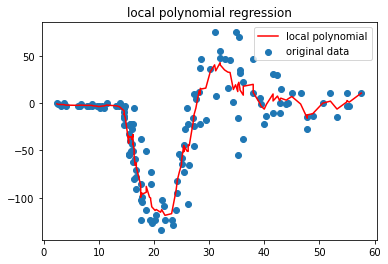

In [2]:
x = pd.read_csv("C:/Users/user/Desktop/mcycle.csv")
y1=x.accel
x1=x.times
plt.scatter(x1,y1)
y_rec = local_polynomial_regression(y1,x1,1,4,1)#M=1局部线性回归 
plt.plot(x1,y_rec,'r')
plt.legend(labels=['local polynomial','original data'],loc='upper right')
plt.title('local polynomial regression')
plt.show()

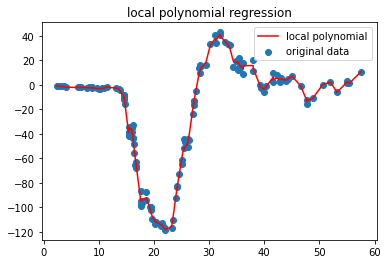

In [3]:
y2=x.accel
x2=x.times
plt.scatter(x2,y2)
y_rec = local_polynomial_regression(y2,x2,1,4,0.4)#M=2局部抛物线回归
plt.plot(x2,y_rec,'r')
plt.legend(labels=['local polynomial','original data'],loc='upper right')
plt.title('local polynomial regression')
plt.show()

In [4]:
#样条回归
from scipy.linalg import solve
x = pd.read_csv("C:/Users/user/Desktop/mcycle.csv")
y=x.accel
x=x.times

In [5]:
c=np.zeros((len(x),len(x)))#创建对应的矩阵
for i in range(len(x)):
    for j in range(len(x)):
        if i==0 :
            if j==0:
                c[i][j]=1
            else:
                c[i][j]=0
 
        if i==len(y)-1:
            if j==len(y)-1:
                c[i][j]=1
            else:
                c[i][j]=0
        else:
            if(i==j):
                c[i][j]=4
            elif(j==i-1 or j==i+1):
                c[i][j]=1
            else:
                c[i][j]=0
c[0][0]=1
c[0][1]=0

In [6]:
#得到m矩阵
kk=np.ones(len(x))
for k in range(len(y)):
    if(k==0 or k==len(y)-1):
        kk[k]=0
    else:
        result=(y[k+1]-y[k])-(y[k]-y[k-1])
        kk[k]=6*result
m=solve(c,kk)                                              #求解方程 得m方程

In [7]:
a_total=[]
b_total=[]
c_total=[]
d_total=[]
for i in range(len(x)-1):
    a=y[i]
    b=((y[i+1]-y[i])/1)-0.5*m[i]-(1/6)*(m[i+1]-m[i])
    c=m[i]/2
    d=(m[i+1]-m[i])/6                                    #公式求解参数

    a_total.append(a)
    b_total.append(b)
    c_total.append(c)
    d_total.append(d)                                     #参数集合

正在画图


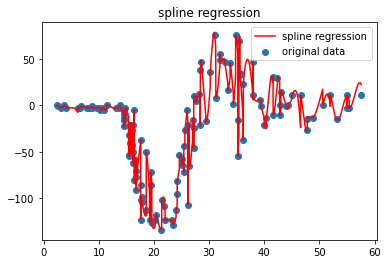

In [8]:
x1_total=[]
y1_total=[]
for i in range(len(x)-1):
    X_X = [x[i], x[i+1]]
    x1 = np.linspace(X_X[0], X_X[1],1000)
    Y1=a_total[i]+b_total[i]*(x1-x[i])+c_total[i]*(x1-x[i])**2+d_total[i]*(x1-x[i])**3        #计算过程
    for x0 in x1:
        x1_total.append(x0)
    for y0 in Y1:
        y1_total.append(y0)
print("正在画图")
plt.scatter(x,y)
plt.plot(x1_total, y1_total,'r')
plt.legend(labels=['spline regression','original data'],loc='upper right')
plt.title('spline regression')
plt.show()